In [94]:
import numpy as np 
import pandas as pd

In [95]:
!pip install streamlit

In [96]:
!pip install scikit-learn matplotlib streamlit joblib

In [97]:
df = pd.read_csv(r'C:\decision-tree-\play.csv')

In [98]:
df

,Outlook,Temperature,Humidity,Wind,PlayTennis
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rainy,Mild,High,Weak,Yes
4,Rainy,Cool,Normal,Weak,Yes
5,Rainy,Cool,Normal,Strong,No
6,Overcast,Cool,Normal,Strong,Yes
7,Sunny,Mild,High,Weak,No


In [99]:


df['Outlook'] = df['Outlook'].map({'Sunny': 0, 'Overcast': 1, 'Rain': 2})
df['Temperature'] = df['Temperature'].map({'Hot': 0, 'Mild': 1, 'Cool': 2})
df['Humidity'] = df['Humidity'].map({'High': 0, 'Normal': 1})
df['Wind'] = df['Wind'].map({'Weak': 0, 'Strong': 1})
df['PlayTennis'] = df['PlayTennis'].map({'No': 0, 'Yes': 1})


In [100]:
df

,Outlook,Temperature,Humidity,Wind,PlayTennis
0,0.0,0,0,0,0
1,0.0,0,0,1,0
2,1.0,0,0,0,1
3,NaN,1,0,0,1
4,NaN,2,1,0,1
5,NaN,2,1,1,0
6,1.0,2,1,1,1
7,0.0,1,0,0,0


In [101]:

from sklearn.preprocessing import LabelEncoder

le_outlook = LabelEncoder()
le_temperature = LabelEncoder()
le_humidity = LabelEncoder()
le_wind = LabelEncoder()
le_play = LabelEncoder()


df['Outlook_num'] = le_outlook.fit_transform(df['Outlook'])
df['Temperature_num'] = le_temperature.fit_transform(df['Temperature'])
df['Humidity_num'] = le_humidity.fit_transform(df['Humidity'])
df['Wind_num'] = le_wind.fit_transform(df['Wind'])
df['PlayTennis_num'] = le_play.fit_transform(df['PlayTennis'])

df


,Outlook,Temperature,Humidity,Wind,PlayTennis,Outlook_num,Temperature_num,Humidity_num,Wind_num,PlayTennis_num
0,0.0,0,0,0,0,0,0,0,0,0
1,0.0,0,0,1,0,0,0,0,1,0
2,1.0,0,0,0,1,1,0,0,0,1
3,NaN,1,0,0,1,2,1,0,0,1
4,NaN,2,1,0,1,2,2,1,0,1
5,NaN,2,1,1,0,2,2,1,1,0
6,1.0,2,1,1,1,1,2,1,1,1
7,0.0,1,0,0,0,0,1,0,0,0


In [102]:
x = df[['Outlook', 'Temperature', 'Humidity', 'Wind']]
y = df['PlayTennis']


print(x)
print(y)

   Outlook  Temperature  Humidity  Wind
0      0.0            0         0     0
1      0.0            0         0     1
2      1.0            0         0     0
3      NaN            1         0     0
4      NaN            2         1     0
5      NaN            2         1     1
6      1.0            2         1     1
7      0.0            1         0     0
0    0
1    0
2    1
3    1
4    1
5    0
6    1
7    0
Name: PlayTennis, dtype: int64


In [103]:
# Create and train the Decision Tree model
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

model = tree.DecisionTreeClassifier()
model = model.fit(x, y)  # X = features, y = target label


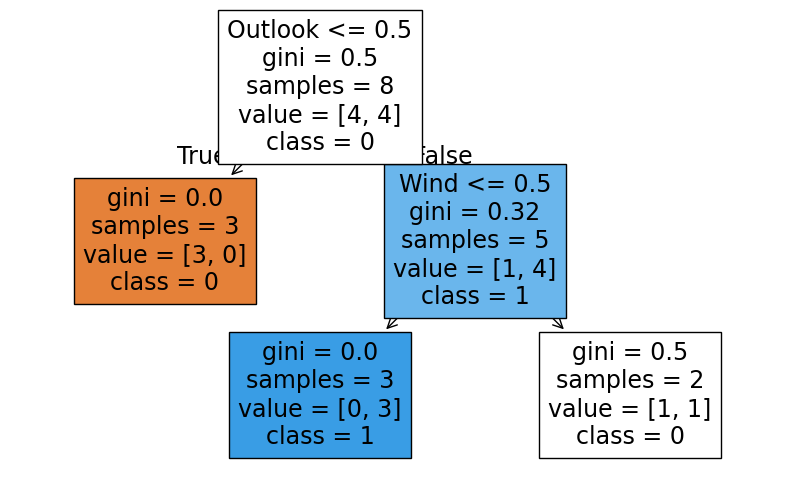

In [104]:
from sklearn import tree
import matplotlib.pyplot as plt


class_names = list(map(str, le_play.classes_))

plt.figure(figsize=(10, 6))
tree.plot_tree(
    model,
    feature_names=['Outlook', 'Temperature', 'Humidity', 'Wind'],
    class_names=class_names,
    filled=True
)
plt.show()


In [105]:
from sklearn.preprocessing import LabelEncoder

# Example data
outlook = ['Sunny', 'Overcast', 'Rainy', 'Rainy', 'Sunny']
temperature = ['Hot', 'Hot', 'Mild', 'Cool', 'Cool']
humidity = ['High', 'High', 'High', 'Normal', 'Normal']
wind = ['Weak', 'Strong', 'Weak', 'Weak', 'Strong']
play = ['No', 'Yes', 'Yes', 'Yes', 'No']

# Label encode all features
le_outlook = LabelEncoder()
le_temperature = LabelEncoder()
le_humidity = LabelEncoder()
le_wind = LabelEncoder()
le_play = LabelEncoder()

outlook_encoded = le_outlook.fit_transform(outlook)
temperature_encoded = le_temperature.fit_transform(temperature)
humidity_encoded = le_humidity.fit_transform(humidity)
wind_encoded = le_wind.fit_transform(wind)
play_encoded = le_play.fit_transform(play)


In [106]:
# Example: Predict if we should play tennis with the following conditions:
# Outlook=Rainy, Temperature=Mild, Humidity=High, Wind=Strong

test = [[le_outlook.transform(['Rainy'])[0],
         le_temperature.transform(['Mild'])[0],
         le_humidity.transform(['High'])[0],
         le_wind.transform(['Strong'])[0]]]

pred = model.predict(test)
print("Play Tennis? ->", le_play.inverse_transform(pred)[0])


Play Tennis? -> Yes


c:\Python pre\AIML_env\.conda\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [107]:
# Save the trained model to a file
import joblib

# Save the model as 'decision_tree_model.pkl'
joblib.dump(model, 'decision_tree_model.pkl')
print("Model saved as 'decision_tree_model.pkl'")


Model saved as 'decision_tree_model.pkl'


In [108]:
# Load the model from the file
loaded_model = joblib.load('decision_tree_model.pkl')
print("Model loaded successfully!")


Model loaded successfully!


In [109]:
# Test: Outlook=Sunny, Temperature=Cool, Humidity=Normal, Wind=Strong

test_new = [[le_outlook.transform(['Sunny'])[0],
             le_temperature.transform(['Cool'])[0],
             le_humidity.transform(['Normal'])[0],
             le_wind.transform(['Strong'])[0]]]

prediction = loaded_model.predict(test_new)
print("Play Tennis? ->", le_play.inverse_transform(prediction)[0])


Play Tennis? -> Yes


c:\Python pre\AIML_env\.conda\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
